In [86]:
#Importing the required libs.
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from pandas.tools.plotting import andrews_curves
from pandas.tools.plotting import parallel_coordinates
from pandas.tools.plotting import radviz
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import NMF

%matplotlib inline

#loading the dataset
from sklearn import datasets

#Setting matplotlib parameters
plt.style.use('fivethirtyeight')
rcParams['axes.labelsize'] = 20
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['text.color'] = 'k'


In [87]:
#Loading iris dataset for experiment
iris = datasets.load_iris()

#converting numpy arrays into pandas dataframe for easy manipulation
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])


In [88]:
#name of columns
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [90]:
#glacing at the data
data.head()
#0 ->virginica,1->versicolor,2->setosa 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


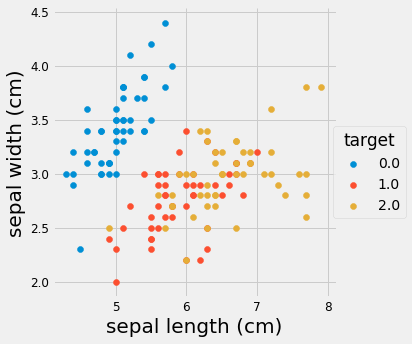

In [91]:
#plotting sepal length Vs width and colored by each target
sns.FacetGrid(data, hue="target", size=5).map(plt.scatter, "sepal length (cm)", "sepal width (cm)").add_legend()

As you can see in above plot, we can certainly say target type 0 is totally distinict than other two when it comes to sepal length and width.

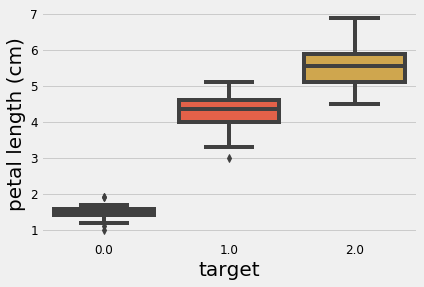

In [92]:
#box plot for petal length and above inference becomes more solid in box plot
sns.boxplot(x="target", y="petal length (cm)", data=data)

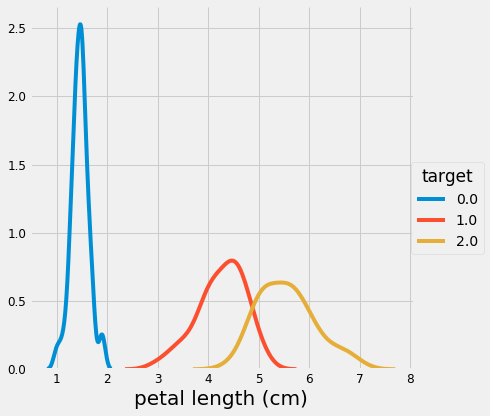

In [93]:
#Plotting the variation of petal length of each target type
sns.FacetGrid(data, hue="target", size=6).map(sns.kdeplot, "petal length (cm)").add_legend()

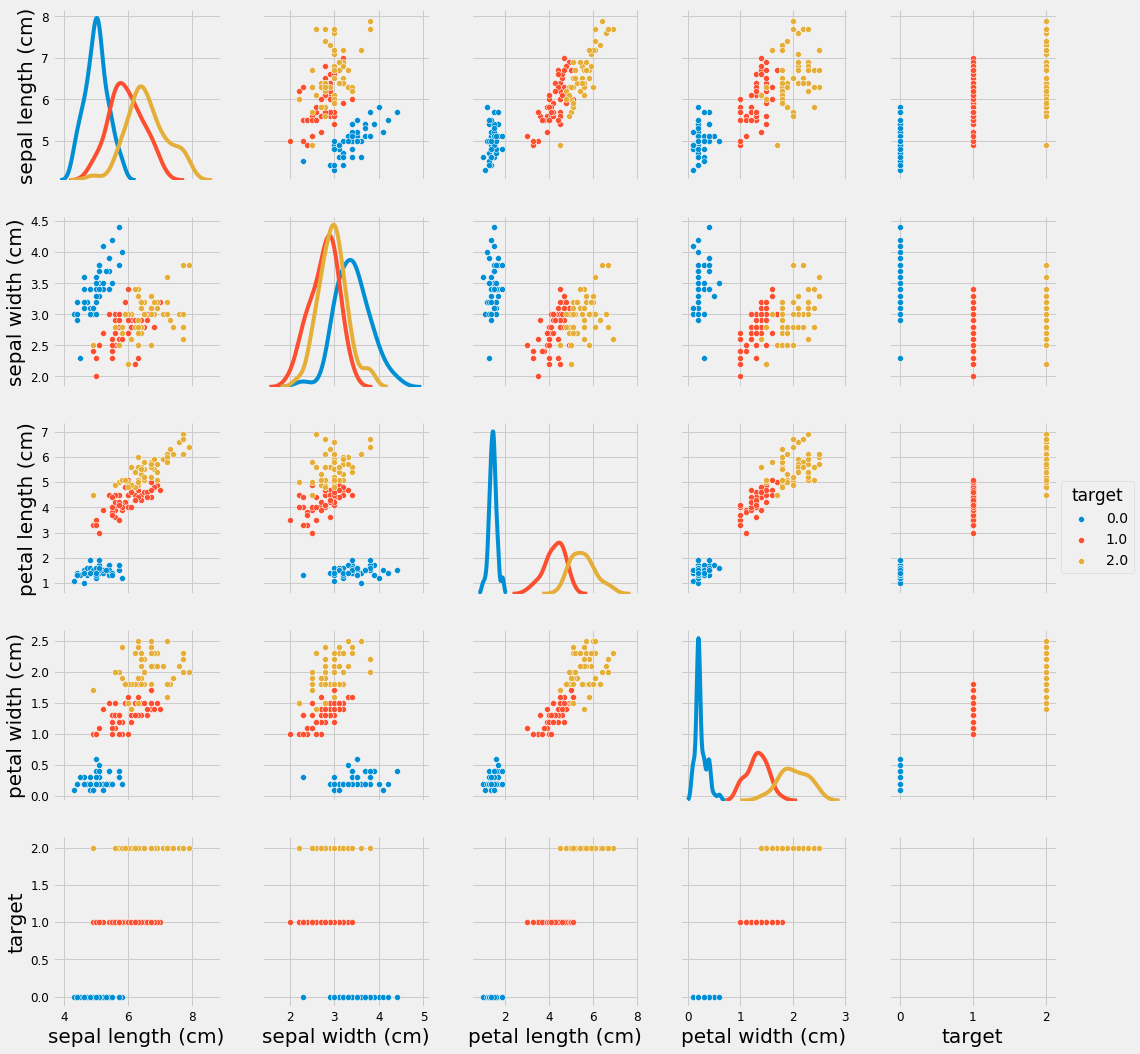

In [94]:
sns.pairplot(data, hue="target", size=3, diag_kind="kde")

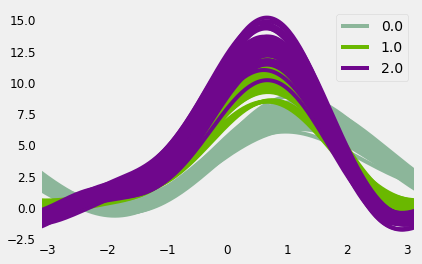

In [95]:
andrews_curves(data, "target")

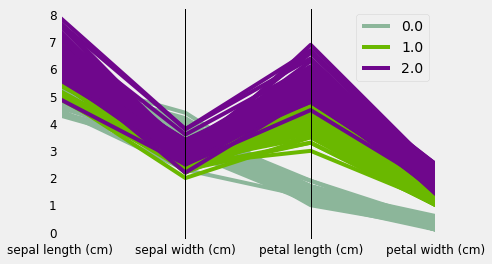

In [96]:
parallel_coordinates(data, "target")

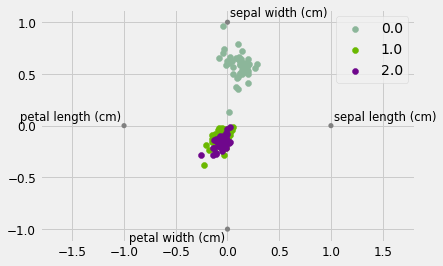

In [97]:
radviz(data, "target")

In [98]:
#data.columns
col_x = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']
col_y = ['target']

#X-> predictors y-> target
X = data[col_x]
y = data[col_y]


In [99]:
#PCA always needs scaling of data
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [100]:
pca = PCA()

pca.fit(X)

features = pca.transform(X)

print(features.shape)

(150, 4)


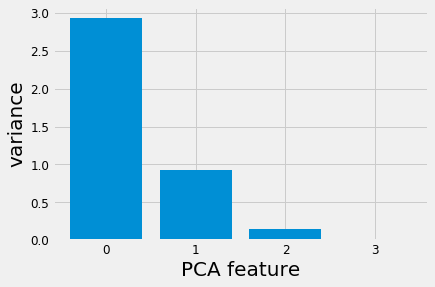

In [101]:
# Plot the explained variances
#As shown in plot only column 0 and 1 capture the maximum of variance.
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


In [102]:
#applying only taking first 2 columns for logistic regression
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

lr = LogisticRegression()
model = lr.fit(principalDf,y)
labels = model.predict(principalDf)


In [103]:
#plotting confusion matrix
confusion_matrix(y, labels)

array([[50,  0,  0],
       [ 0, 37, 13],
       [ 0,  7, 43]], dtype=int64)

As you can see in above confusion matrix logistic regression is facing certain difficulty in descerning between target 1 and 2.

In [104]:
# as NMF dont take negative value here we will be applying Min Max scaling before performing NMF.

minmax = MinMaxScaler()

nmf_X = minmax.fit_transform(data[col_x])

In [105]:
#appling NMF on same dataset

#Performing Dimenional Reduction through Non Negative Matrix Factorization - NFM


model = NMF(n_components=2)

# giving normal data as NMF dont accept negative values
model.fit(nmf_X)

# Transform the articles: nmf_features
nmf_features = model.transform(nmf_X)

In [106]:
nfm_model = lr.fit(nmf_features,y)
nfm_labels = nfm_model.predict(nmf_features)

confusion_matrix(y, nfm_labels)

array([[50,  0,  0],
       [ 0, 22, 28],
       [ 0,  1, 49]], dtype=int64)